In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
STdf = pd.read_csv('../data/Preseason/Aggregate/Summaries/2025mean-player-batting-order.csv')
Pdf = pd.read_csv('../../mlb-player-predictions/predictions/2025/batter_predictions_2025_022325.csv') # this repository is private right now, but we'll change that soon!
Pdf['player'] = Pdf['Name'].apply(lambda x: x.strip())
df = pd.merge(STdf,Pdf,left_on='player',right_on='player',how='inner')

In [41]:
df['PA_forecast'] = np.round(2*(-9*df['avg']+380),0) # using an empirically derived formula to estimate PA
df['PAdiff'] = np.abs(df['PA_forecast']-df['PA'].astype('float'))


In [42]:
df = df.sort_values(by='avg',ascending=True)
sdf = df.loc[(df['ngames']>5)]

print(sdf[['player', 'avg', 'ngames', 'team','PA','PA_forecast']])

sdf.to_csv('2025-PA-forecast.csv',index=False)

              player   avg  ngames team   PA  PA_forecast
316   Jonathan India  1.00       8   KC  569        742.0
25       Jose Altuve  1.00       6  HOU  636        742.0
284        TJ Friedl  1.00       8  CIN  514        742.0
32   Lawrence Butler  1.00       7  ATH  607        742.0
212      Luis Arraez  1.00       8   SD  639        742.0
..               ...   ...     ...  ...  ...          ...
91         Jon Berti  7.67       9  CHC  184        622.0
119       Andy Pages  7.78       9  LAD  219        620.0
9       Kevin Newman  8.00       7  LAA  219        616.0
375    Oswald Peraza  8.14       7  NYY  231        613.0
20       Jake Meyers  8.43       7  HOU  409        608.0

[306 rows x 6 columns]


In [44]:
df = df.sort_values(by='avg',ascending=True)
sdf = df.loc[(df['avg']<1.2) & (df['ngames']>6)]

print(sdf[['player', 'avg', 'ngames', 'team']])

               player   avg  ngames team
316    Jonathan India  1.00       8   KC
284         TJ Friedl  1.00       8  CIN
32    Lawrence Butler  1.00       7  ATH
212       Luis Arraez  1.00       8   SD
138       Steven Kwan  1.00       8  CLE
343      Matt Wallner  1.00       8  MIN
280      Jarren Duran  1.00       8  BOS
98        Ketel Marte  1.00      10   AZ
86           Ian Happ  1.00      10  CHC
302     Brenton Doyle  1.00       8  COL
254     Marcus Semien  1.00      10  TEX
186         CJ Abrams  1.00       8  WSH
78         Masyn Winn  1.00       8  STL
152     Victor Robles  1.00       9  SEA
181  Francisco Lindor  1.00       7  NYM
170    Xavier Edwards  1.00       7  MIA
241        Tommy Pham  1.11       9  PIT
269        Yandy Diaz  1.14       7   TB


Text(0, 0.5, 'difference in predicted PA')

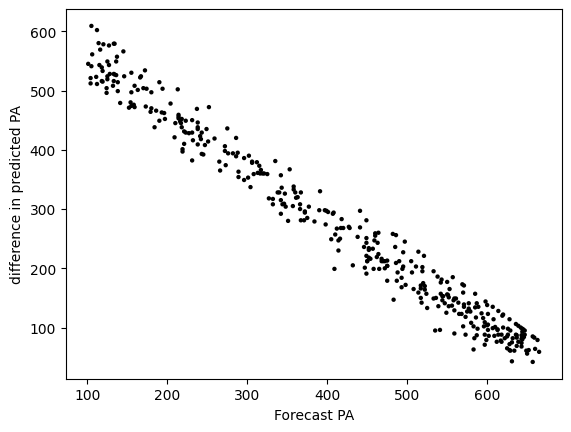

In [45]:
df = df.sort_values(by='PAdiff',ascending=False)
plt.scatter(df['PA'],df['PAdiff'],edgecolor='none',facecolor='black',s=10.)
plt.xlabel('Forecast PA')
plt.ylabel('difference in predicted PA')